<a href="https://colab.research.google.com/github/YeongjiLee0115/githubtest/blob/main/slides/module_4/bob_ross_libraries_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Painting with Bob Ross!

Let's learn about some useful Python libraries by applying them to [Bob Ross](https://en.wikipedia.org/wiki/Bob_Ross)'s paintings.


![Bob Ross](https://upload.wikimedia.org/wikipedia/en/7/70/Bob_at_Easel.jpg)

First, let's import our libraries:
  - numpy: introduces the `array` datatype, good for representing and manipulating matrices
  - pandas: introduces the `DataFrame` object-- a wrapper for arrays that provides labels for rows and columns
  - matplotlib: basic plotting library (lots of overlap with MATLAB plotting features, similar syntax)
  - seaborn: wrapper for matplotlib that makes plots look nicer, also adds some useful functionality
  - hypertools: wrapper for seaborn, pandas, and scikit-learn (machine learning library) that provides some useful tools for visualizing and manipulating arrays and DataFrames

In [22]:
%pip install davos
import davos

davos.suppress_stdout = True
#davos help it to make the library on right version 
#davos only works for notebooks


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
smuggle hypertools as hyp  # pip: hypertools==0.8.0
smuggle numpy as np
smuggle pandas as pd
smuggle matplotlib as mpl
smuggle seaborn as sns

# Exploring Bob Ross's paintings

Inspired by [this article](https://fivethirtyeight.com/features/a-statistical-analysis-of-the-work-of-bob-ross/), we'll take a dive into Bob Ross's paintings using two datasets:
- `painting_features`: titles and attributes of the paintings featured in each of Bob Ross's episodes
- `paintings`: links to an image of each painting, a youtube recording of each painting's associated episode, plus some information about the colors used in each painting

We'll load both datasets using the `read_csv` function:

In [24]:
painting_features = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/bob-ross/elements-by-episode.csv') # this website is just text separated by oommas
paintings = pd.read_csv('https://raw.githubusercontent.com/jwilber/Bob_Ross_Paintings/master/data/bob_ross_paintings.csv')

The `head` function in Pandas prints out the first few rows of a DataFrame; this is a great way to "get acquainted" with a new dataset:

In [25]:
painting_features.head() #by default, the first 5 rows are displayed
#.tail() print out the last part

,EPISODE,TITLE,APPLE_FRAME,AURORA_BOREALIS,BARN,BEACH,BOAT,BRIDGE,BUILDING,BUSHES,...,TOMB_FRAME,TREE,TREES,TRIPLE_FRAME,WATERFALL,WAVES,WINDMILL,WINDOW_FRAME,WINTER,WOOD_FRAMED
0,S01E01,"""A WALK IN THE WOODS""",0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
1,S01E02,"""MT. MCKINLEY""",0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
2,S01E03,"""EBONY SUNSET""",0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
3,S01E04,"""WINTER MIST""",0,0,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,0
4,S01E05,"""QUIET STREAM""",0,0,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,0


In [26]:
paintings.head(3) #we can adjust how many rows are printed by passing an argument to the head function

,Unnamed: 0,painting_index,img_src,painting_title,season,episode,num_colors,youtube_src,colors,color_hex,...,Liquid_Clear,Midnight_Black,Phthalo_Blue,Phthalo_Green,Prussian_Blue,Sap_Green,Titanium_White,Van_Dyke_Brown,Yellow_Ochre,Alizarin_Crimson
0,1,282,https://www.twoinchbrush.com/images/painting28...,A Walk in the Woods,1,1,8,https://www.youtube.com/embed/oh5p5f5_-7A,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",...,0,0,0,1,1,1,1,1,0,1
1,2,283,https://www.twoinchbrush.com/images/painting28...,Mt. McKinley,1,2,8,https://www.youtube.com/embed/RInDWhYceLU,"['Alizarin Crimson', 'Bright Red', 'Cadmium Ye...","['#4E1500', '#DB0000', '#FFEC00', '#102E3C', '...",...,0,0,0,1,1,1,1,1,0,1
2,3,284,https://www.twoinchbrush.com/images/painting28...,Ebony Sunset,1,3,9,https://www.youtube.com/embed/UOziR7PoVco,"['Alizarin Crimson', 'Black Gesso', 'Bright Re...","['#4E1500', '#000000', '#DB0000', '#FFEC00', '...",...,0,0,0,1,1,1,1,1,0,1


Next, let's define some functions to display painting images and YouTube videos:

In [27]:
import os #python interactive system 
import urllib.request as get #interact with internet, request module in this library is how you sent out youre request (type the web browser and it deal with all complicated things)
from IPython.lib.display import YouTubeVideo 
import PIL # python image library

#it comes with python, built-in : os, urllib
#no built-in : IPython, PIL

# display a painting, given its url
# note: use return_image=True to get the image data
# as an n_rows by n_columns by n_colors numpy array
def imshow(url, *args, **kwargs):
  img = np.array(PIL.Image.open(get.urlopen(url))) #matplotlib

  if 'return_img' in kwargs.keys() and kwargs['return_img']:
    return img
  kwargs.pop('return_img', None)

  return mpl.pyplot.imshow(img, *args, **kwargs)

#display a youtube video, given its url
def youtube(url):
  id = os.path.split(url)[-1]
  return YouTubeVideo(id)

Let's plot an example painting along with its video:

Displaying the image and YouTube video for painting #171 (Meadow Brook Surprise):


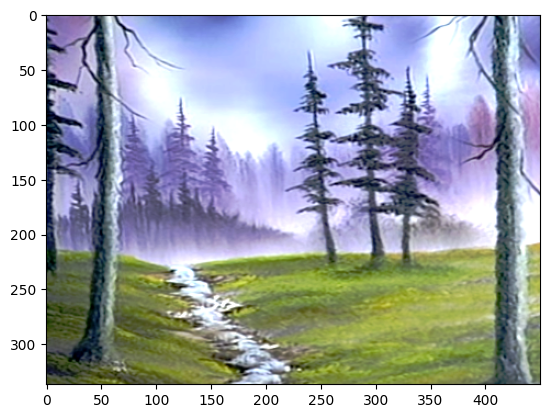

In [28]:
p = np.random.randint(paintings.shape[0]) # pick any number between 0 and paintings.shape[0] - 1, inclusive

print(f'Displaying the image and YouTube video for painting #{p + 1} ({paintings.iloc[p]["painting_title"]}):')
imshow(paintings.iloc[p]['img_src']);

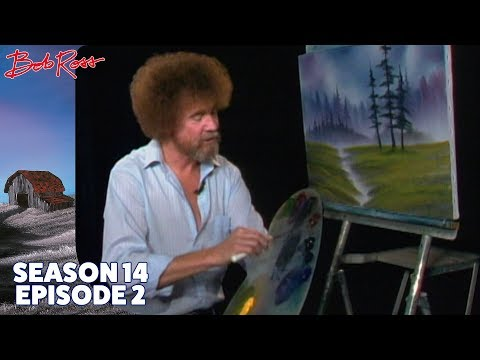

In [29]:
youtube(paintings.iloc[p]['youtube_src'])

We can also get the image data directly (rather than displaying it) using the `return_img` argument:

In [30]:
x = imshow(paintings.iloc[p]['img_src'], return_img=True)
print(f'x is of type {type(x)} and it\'s shape is {x.shape}') #337 tall 450 wide 3 color chart?

x is of type <class 'numpy.ndarray'> and it's shape is (337, 450, 3)


Sometimes it can be useful to reshape an image to (or from) a column (or row) vector.  Numpy's `ravel` function makes this easy:

In [34]:
?np.reshape #columns will stack each other 
#if you want to rows tack each other
#x_vec.reshape(x.shape, order ='F')

x.ravel() has shape (454950,) and x_recovered has shape (337, 450, 3).  Here's what x_recovered looks like:


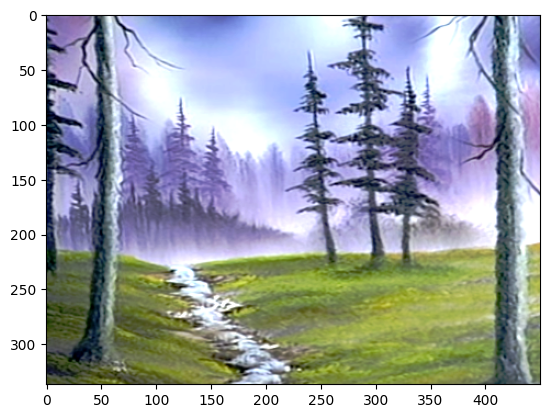

In [31]:
x_vec = x.ravel() #ravel: n dimensional matrix into one dimensional vector by reshaping it
x_recovered = x_vec.reshape(x.shape) #recover it
print(f'x.ravel() has shape {x_vec.shape} and x_recovered has shape {x_recovered.shape}.  Here\'s what x_recovered looks like:')
mpl.pyplot.imshow(x_recovered); #see what happens when you include vs. exclude the semicolon here...

Finally, let's do a quick clustering analysis of the paintings based on their features.  First, we can plot a heatmap of the features using `seaborn`.  We'll exclude the first two columns, since they can't easily be vectorized. :

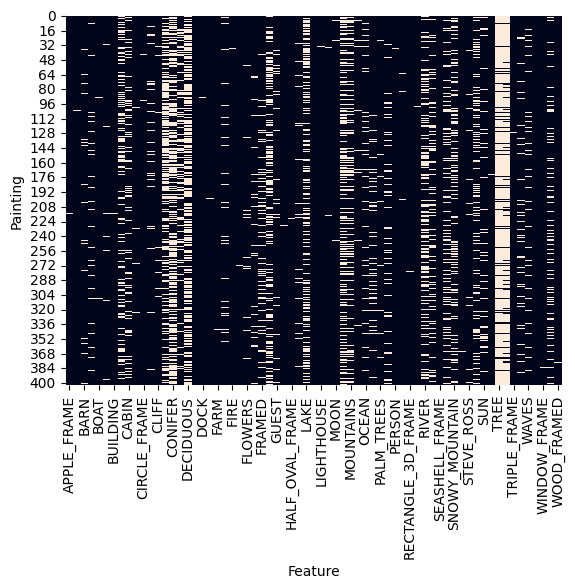

In [32]:
ax = sns.heatmap(painting_features[painting_features.columns[2:]], cbar=False);
ax.set_ylabel('Painting');
ax.set_xlabel('Feature');
#you can turn anything to feature vector, this case human annotated data was turn into feature vector

Next let's use hypertools to cluster the paintings:

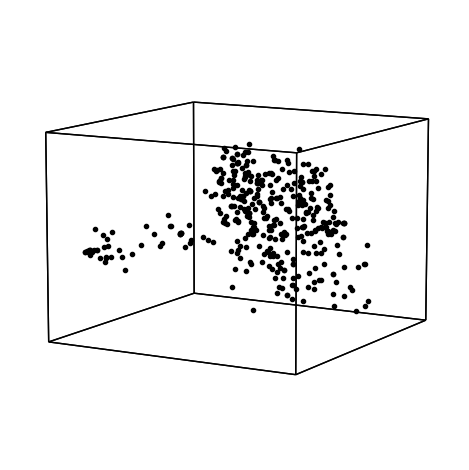

In [35]:

hyp.plot(painting_features, 'k.');
#each painting is a dot, 

/usr/local/lib/python3.9/dist-packages/hypertools/plot/plot.py:508: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  kwargs[kwarg]=np.array(kwargs[kwarg])


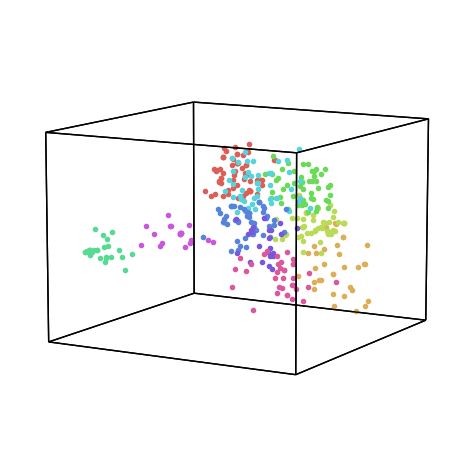

In [33]:
hyp.plot(painting_features, '.', cluster='KMeans', n_clusters=10);
#each painting is a dot, 

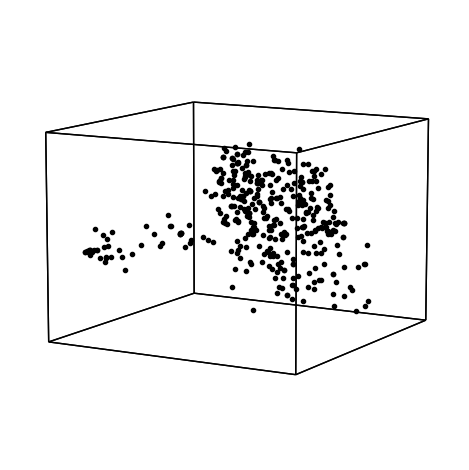

In [36]:
hyp.plot(painting_features, 'k.', reduce='IncrementalPCA'); #try 'FastICA','UMAP' 
#PCA: picking three components that explains the most 
#UMAP: embeddings from high to low dimensional space 
#use correlation between coordinates to see their relationship, it preserves the distance matrix
#in the scikit learn library, they have whole bunch of algorithms
#incrementalPCA: deterministic PCA you get the same result everytime

## Some things to explore:

- What are the most common combinations of features in the paintings?
- What proportion of the paintings contain:
  - At least one type of tree
  - At least two types of trees
  - One or more deciduous trees
  - One or more coniferous trees
  - Clouds
  - Some sort of man-made structure
  - Daytime (versus nighttime)
- Which colors are most common?
  - Can you create a visualization of the colors?  E.g.:
    - Modify `imshow` to also display the dominant paint colors in some nice-looking way alongside the image of the painting.  (Hint: check out `matplotlib.pyplot.subplots`)
    - Can you create a bar chart showing the proportions of paintings that use each color?  You could color each bar using the associated color.
    - Can you write a function to try to estimate the proportion of each color reflected in each individual *painting*?
- Are there any interesting clusters, patterns, or interactions between which colors are used versus which features are in the paintings?
- Can you cluster paintings by the images themselves (instead of their features)?  What do you see and what do you think it means?
  - Hint: use list comprehensions to get the "raveled" image for each painting, and then use `numpy.vstack` to turn them into a number-of-paintings by (number-of-pixels * number-of-color-channels) numpy array.  Then pass the array to hypertools to project the result into 3D and create a plot.

Try to come up with something interesting to try out or say about this dataset and share it with the class when we reconvene.